# Tasa de VIH cada 100 mil habitantes

 Se procedera a analizar el dataset <i>"Tasa de VIH por 100 mil habitantes por sexo y grupo etario 2020-2022"</i>, obtenido de los datos abiertos del ministerio de salud de Argentina:
    <ul><link>http://datos.salud.gob.ar/dataset/13932ccb-a539-4bea-986f-9dae09e06503/archivo/537e4cb2-01f5-4fec-b098-368cdc82e07e</link></ul>


In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [55]:
url="tasa-vih-sexo-grupo-etario-2010-2022-argentina.csv"

df = pd.read_csv(url)

df

,id_sexo,sexo,id_grupo_etario,grupo_etario,anio,tasa_vih
0,3,ambos_sexos,10,total_grupo,2010,17.6
1,3,ambos_sexos,10,total_grupo,2011,17.4
2,3,ambos_sexos,10,total_grupo,2012,17.3
3,3,ambos_sexos,10,total_grupo,2013,17.1
4,3,ambos_sexos,10,total_grupo,2014,15.3
...,...,...,...,...,...,...
385,1,varones,9,65 o más,2018,2.0
386,1,varones,9,65 o más,2019,2.3
387,1,varones,9,65 o más,2020,1.7
388,1,varones,9,65 o más,2021,2.8


**Descripción del dataset y sus variables**

El dataset indica la tasa de personas que llevan el virus de inmunodeficiencia adquirida (VIH) en nuestro país por cada 100 mil habitantes.

Las tasas se calculan por año, y se categorizan en sexo de la persona y rango etaria a la cuál pertenece.

Las variables que se encuentran en el dataset son:

<table>
    <tr>
        <th>Campo</th>
        <th>Descripción</th>
        <th>Contenido</th>
    </tr>
    <tr>
        <td>id_sexo</td>
        <td>Es un número de ID que indica el sexo de la persona</td>
        <td>Los valores a tomar son: 1= Varones, 2= Mujeres, 3 = Ambos_sexos</td>
    </tr>
    <tr>
        <td>sexo</td>
        <td>Indica el sexo al cuál pertenece la persona</td>
        <td>Coincide con el id_sexo en los valores a tomar</td>
    </tr>
    <tr>
        <td>id_grupo_etario</td>
        <td>Es un número identificador del grupo etario al cual pertenece la persona</td>
        <td>Toma los valores del 1 al 10</td>
    </tr>
    <tr>
        <td>grupo_etario</td>
        <td>Indica el rango etario al cuál pertenece la persona</td>
        <td>Se relaciona con el id_grupo_etario, tomando los siguientes valores: 0-9, 10-14, 15-19, 20-24, 25-34, 35-44, 45-54, 55-64, 64 o mas, total_grupo</td>
    </tr>
    <tr>
        <td>anio</td>
        <td>Indica el año del relevo</td>
        <td>Abarca desde el año 2010 al 2022, inclusive</td>
    </tr>
    <tr>
        <td>tasa_vih</td>
        <td>Indica la tasa de personas que poseen el virus del VIH</td>
        <td>Es un valor decimal entre 0 (nadie) y 100 (todos)</td>
    </tr>
</table>


## Preparación de datos

In [56]:
null_values = df.isnull().sum()
null_values

id_sexo            0
sexo               0
id_grupo_etario    0
grupo_etario       0
anio               0
tasa_vih           0
dtype: int64

In [57]:
min_value = df['tasa_vih'].min()
max_value = df['tasa_vih'].max()

Q1 = df['tasa_vih'].quantile(0.25)
Q3 = df['tasa_vih'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['tasa_vih'] < lower_bound) | (df['tasa_vih'] > upper_bound)]

print(f'Valor mínimo de tasa_vih del dataframe: {min_value}')
print(f'Primer cuartil: {Q1}')

print(f'Valor máximo de tasa_vih del dataframe: {max_value}')
print(f'Tercer cuartil: {Q3}')

print("Valores Atípicos para la columna tasa_vih del dataframe:")
print(outliers)

Valor mínimo de tasa_vih del dataframe: 0.1
Primer cuartil: 1.725
Valor máximo de tasa_vih del dataframe: 55.4
Tercer cuartil: 20.3
Valores Atípicos para la columna tasa_vih del dataframe:
     id_sexo     sexo  id_grupo_etario grupo_etario  anio  tasa_vih
325        1  varones                5      25 - 34  2010      51.5
326        1  varones                5      25 - 34  2011      52.4
327        1  varones                5      25 - 34  2012      53.3
328        1  varones                5      25 - 34  2013      55.4
329        1  varones                5      25 - 34  2014      53.6
330        1  varones                5      25 - 34  2015      53.9
331        1  varones                5      25 - 34  2016      49.4
338        1  varones                6      35 - 44  2010      52.5
339        1  varones                6      35 - 44  2011      50.1


Si bien el dataframe posee valores atípicos, no se considera descartarlos ya que al ser datos del servicio de salud, consideramos que son ciertos y los valores atípicos no se deben a inconsistencias en los datos.

## Análisis univariado

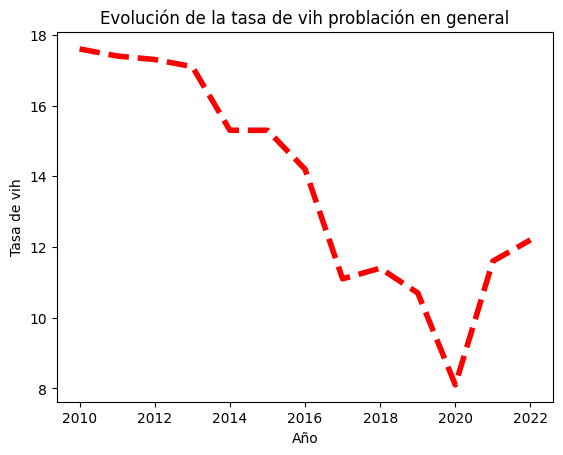

In [58]:
df_grupo_etario_10 = df.drop(df[df['id_grupo_etario'] != 10].index, axis=0) #Elimino los registros que no sean el grupo etario total
df_ambos_sexos = df_grupo_etario_10.drop(df_grupo_etario_10[df_grupo_etario_10['id_sexo']!= 3].index, axis=0)

fig1, ax1 = plt.subplots()

ax1.plot(df_ambos_sexos['anio'],df_ambos_sexos['tasa_vih'],color='red',linestyle='--',linewidth=4)
ax1.set_xlabel('Año')
ax1.set_ylabel('Tasa de vih')
ax1.set_title('Evolución de la tasa de vih problación en general')

plt.show()

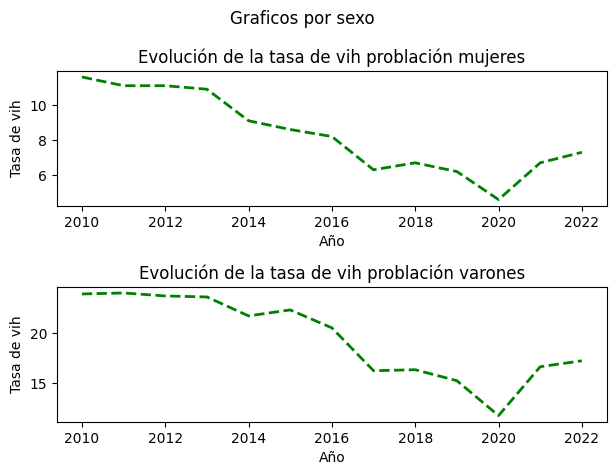

In [59]:
#Analisis por sexo

df_mujeres = df_grupo_etario_10.drop(df_grupo_etario_10[df_grupo_etario_10['id_sexo']!= 2 ].index, axis=0)
df_varones = df_grupo_etario_10.drop(df_grupo_etario_10[df_grupo_etario_10['id_sexo']!= 1 ].index, axis=0)

#Ploting
fig2, ax2 = plt.subplots(2,1)

ax2[0].plot(df_mujeres['anio'],df_mujeres['tasa_vih'],color='green',linestyle='--', linewidth=2)
ax2[0].set_xlabel('Año')
ax2[0].set_ylabel('Tasa de vih')
ax2[0].set_title('Evolución de la tasa de vih problación mujeres')

ax2[1].plot(df_varones['anio'],df_varones['tasa_vih'],color='green',linestyle='--',linewidth=2)
ax2[1].set_xlabel('Año')
ax2[1].set_ylabel('Tasa de vih')
ax2[1].set_title('Evolución de la tasa de vih problación varones')

fig2.suptitle('Graficos por sexo')
fig2.tight_layout()

plt.show()


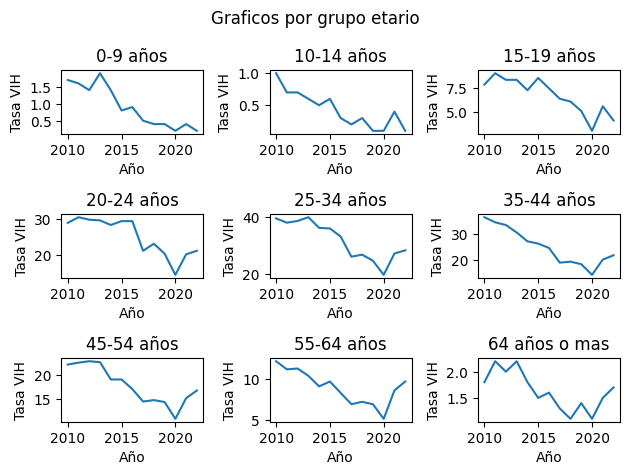

In [60]:
#Analisis por grupo etario

df_sexo_ambos = df.drop(df[df['id_sexo'] != 3].index, axis=0)

df_etario_1 = df_sexo_ambos.drop(df_sexo_ambos[df_sexo_ambos['id_grupo_etario'] != 1].index, axis =0)
df_etario_2 = df_sexo_ambos.drop(df_sexo_ambos[df_sexo_ambos['id_grupo_etario'] != 2].index, axis =0)
df_etario_3 = df_sexo_ambos.drop(df_sexo_ambos[df_sexo_ambos['id_grupo_etario'] != 3].index, axis =0)
df_etario_4 = df_sexo_ambos.drop(df_sexo_ambos[df_sexo_ambos['id_grupo_etario'] != 4].index, axis =0)
df_etario_5 = df_sexo_ambos.drop(df_sexo_ambos[df_sexo_ambos['id_grupo_etario'] != 5].index, axis =0)
df_etario_6 = df_sexo_ambos.drop(df_sexo_ambos[df_sexo_ambos['id_grupo_etario'] != 6].index, axis =0)
df_etario_7 = df_sexo_ambos.drop(df_sexo_ambos[df_sexo_ambos['id_grupo_etario'] != 7].index, axis =0)
df_etario_8 = df_sexo_ambos.drop(df_sexo_ambos[df_sexo_ambos['id_grupo_etario'] != 8].index, axis =0)
df_etario_9 = df_sexo_ambos.drop(df_sexo_ambos[df_sexo_ambos['id_grupo_etario'] != 9].index, axis =0)

#Ploting

fig3, ax3 = plt.subplots(3,3)

ax3[0][0].plot(df_etario_1['anio'],df_etario_1['tasa_vih'])
ax3[0][0].set_xlabel('Año')
ax3[0][0].set_ylabel('Tasa VIH')
ax3[0][0].set_title('0-9 años')

ax3[0][1].plot(df_etario_2['anio'],df_etario_2['tasa_vih'])
ax3[0][1].set_xlabel('Año')
ax3[0][1].set_ylabel('Tasa VIH')
ax3[0][1].set_title('10-14 años')

ax3[0][2].plot(df_etario_3['anio'],df_etario_3['tasa_vih'])
ax3[0][2].set_xlabel('Año')
ax3[0][2].set_ylabel('Tasa VIH')
ax3[0][2].set_title('15-19 años')

ax3[1][0].plot(df_etario_4['anio'],df_etario_4['tasa_vih'])
ax3[1][0].set_xlabel('Año')
ax3[1][0].set_ylabel('Tasa VIH')
ax3[1][0].set_title('20-24 años')

ax3[1][1].plot(df_etario_5['anio'],df_etario_5['tasa_vih'])
ax3[1][1].set_xlabel('Año')
ax3[1][1].set_ylabel('Tasa VIH')
ax3[1][1].set_title('25-34 años')

ax3[1][2].plot(df_etario_6['anio'],df_etario_6['tasa_vih'])
ax3[1][2].set_xlabel('Año')
ax3[1][2].set_ylabel('Tasa VIH')
ax3[1][2].set_title('35-44 años')

ax3[2][0].plot(df_etario_7['anio'],df_etario_7['tasa_vih'])
ax3[2][0].set_xlabel('Año')
ax3[2][0].set_ylabel('Tasa VIH')
ax3[2][0].set_title('45-54 años')

ax3[2][1].plot(df_etario_8['anio'],df_etario_8['tasa_vih'])
ax3[2][1].set_xlabel('Año')
ax3[2][1].set_ylabel('Tasa VIH')
ax3[2][1].set_title('55-64 años')

ax3[2][2].plot(df_etario_9['anio'],df_etario_9['tasa_vih'])
ax3[2][2].set_xlabel('Año')
ax3[2][2].set_ylabel('Tasa VIH')
ax3[2][2].set_title('64 años o mas')

fig3.suptitle('Graficos por grupo etario')
fig3.tight_layout()

plt.show()

**Conclusiones**

Del análisis de todos los gráficos concluimos:

<ul>
    <li>La tendencia a la baja desde el año de comienzo de toma de datos (2010), con pico mínimo en el año 2020.</li>
    <li>Este mínimo podría haber sido causado debido a la pandemia de Covid-19, la cuál impulso a principios del año 2020 el Aislamiento Social Preventivo Obligatio (ASPO). Por lo que las personas que no se consideran de tareas esenciales no debian abandonar su domicilio.</li>
    <li>Debido al aislamiento que prohibia abandonar el domicilio, las personas no tenian relacion con quienes no habitaban el mismo domicilio, por lo cuál es el mayor indicado del porque se dio el pico mínimo en este año.</li>
    <li>En cuanto a las diferencias por sexo, la tasa asociada a los varones se mantiene por sobre la tasa asociada a las mujeres. Esta tasa superior podría deberse a falta de prevención, cuidados, desconocimiento/ignorancia de las formas de contagio, desconomiento/ignorancia de si la persona con la cuál copula es portador del VIH, como así la falta de estudios frecuentes para corroborar la presencia del virus.</li>
    <li>En los gráficos de rangos etarios, notamos que la tendencia a la baja que se da desde el año 2010 con su pico mínimo en el año 2020, se mantienen entre las edades de 0 a 19 años.</li>
    <li>En cambio, en la franja etaria de 20 años en adelante, la tendencia a la suba de contagias es creciente.</li>
    <li>Las tendencias a la baja en menores de 19 años y de alza en mayores de 20, probablemente se deba a que los primeros mantienen menos relaciones sexuales, o al menos con menos personas, como así también a la prevención o cuidados de ellos, como así también de los padres que son VIH positivos pero mantienen cuidados y controles con sus hijos.</li>
</ul>
<h4>Como conclusión final, podria decirse que es necesario recalcar la importancia de la prevención, cuidado, estudios y educación acerca de lo que se refiere a ser VIH positivo, tanto desde ambitos privados como publicos, con un fuerte incapie sobre todo a los varones entre 20 y 54 años, que es donde se presenta la mayor tasa de positivos.</h4>